## 线性回归

In [1]:
import platform
import pickle
import numpy as np
import matplotlib.pyplot as mp
import sklearn.linear_model as sl
import sklearn.metrics as sm
import matplotlib.patches as mc

[[ 4.94]
 [-1.58]
 [-4.45]
 [-6.06]
 [-1.22]
 [-3.55]
 [ 0.36]
 [-3.24]
 [ 1.31]
 [ 2.17]
 [ 2.94]
 [-0.92]
 [-0.91]
 [ 1.24]
 [ 1.56]
 [-4.14]
 [ 3.75]
 [ 4.15]
 [ 0.33]
 [ 3.41]
 [ 2.27]
 [ 2.6 ]
 [ 1.06]
 [ 1.04]
 [ 2.74]
 [-0.71]
 [-2.75]
 [ 0.55]
 [-3.45]
 [ 1.09]
 [ 2.47]
 [-6.35]
 [ 1.83]
 [-0.68]
 [-3.83]
 [-2.03]
 [ 3.13]
 [ 0.92]
 [ 4.02]
 [ 3.89]
 [-1.81]
 [ 3.94]
 [-2.  ]
 [ 0.54]
 [ 0.78]
 [ 2.15]
 [ 2.55]
 [-0.63]
 [ 1.06]
 [-0.36]]
[4.37 1.7  1.88 0.56 2.23 1.53 2.99 0.48 2.76 3.99 3.25 2.27 2.   4.75
 3.52 1.39 4.9  4.44 2.72 4.59 5.3  3.43 2.53 3.69 3.1  2.72 2.82 3.53
 1.77 4.61 4.24 1.   3.84 2.42 0.67 1.07 3.19 4.21 5.24 3.94 2.85 4.86
 1.31 3.99 2.92 4.72 3.83 2.58 2.89 1.99]
0.5458357773394897 0.45030708467973657 0.5011681341635597 0.7446426643168624 0.7446426643168624
0.5385833820563092 0.38345050992911 0.5427781041918647 0.6762884986711244 0.6751586633878082


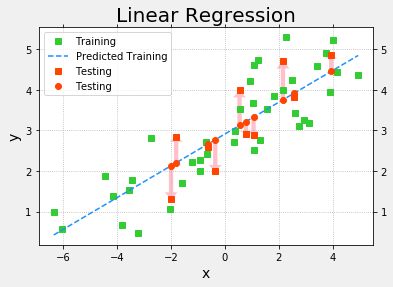

In [31]:
def read_data(file_name):
    x,y = [],[]
    with open(file_name,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
        return np.array(x),np.array(y)

# 训练模型
def train_model(x,y):
    model = sl.LinearRegression()
    # 对数据集进行训练
    model.fit(x,y)
    return model

# 预测模型
def pred_model(model,x):
    y = model.predict(x)
    return y

# 评估模型
def eval_model(y,pred_y):
    # 平均绝对误差
    mae = sm.mean_absolute_error(y,pred_y)
    mse = sm.mean_squared_error(y,pred_y)
    mda = sm.median_absolute_error(y,pred_y)
    evs = sm.explained_variance_score(y,pred_y)
    r2s = sm.r2_score(y,pred_y)
    print(mae,mse,mda,evs,r2s)
    
# 保存模型
def save_model(model,filename):
    with open(filename,'wb') as f:
        pickle.dump(model,f)

def init_chart():
    # gcf():get_current_figure
    mp.gcf().set_facecolor(np.ones(3)*240/255)
    mp.title('Linear Regression',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    # 设置刻度
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    # 绘画网格
    mp.grid(linestyle=':')
    
def draw_train(train_x,train_y,pred_train_y):
    mp.plot(train_x,train_y,'s',c='limegreen',
           label='Training')
    # 排序索引,argsort()返回数组从小到大的索引值
    sorted_indices = train_x.T[0].argsort()
    mp.plot(train_x.T[0][sorted_indices],
           pred_train_y[sorted_indices],'--',c='dodgerblue',
           label='Predicted Training')
    mp.legend()

def draw_test(test_x,test_y,pred_test_y):
    mp.plot(test_x,test_y,'s',c='orangered',label='Testing')
    mp.plot(test_x,pred_test_y,'o',c='orangered',label='Testing')
    for x,pred_y,y in zip(test_x,pred_test_y,test_y):
        mp.gca().add_patch(mc.Arrow(x,pred_y,0,y-pred_y,
                                   width=0.8,
                                   ec='none',
                                   fc='pink'))
        
    mp.legend()
    
def show_chart():
    mng = mp.get_current_fig_manager()
    if 'Windows' in platform.system():
        mng.window.state('zoomed')
    else:
        mng.resize(100,100)
    mp.show()
    
def main():
    x,y = read_data('single.txt')
    print(x,y,sep='\n')
    # 取总样本的百分之八十作为训练集
    train_size = int(x.size*0.8)
    train_x = x[:train_size]
    train_y = y[:train_size]
    model = train_model(train_x,train_y)
    pred_train_y = pred_model(model,train_x)
    # 对模型进行评估
    eval_model(train_y,pred_train_y)
    test_x = x[train_size:]
    test_y = y[train_size:]
    pred_test_y = pred_model(model,test_x)
    eval_model(test_y,pred_test_y)
    save_model(model,'linear.mod')
    init_chart()
    draw_train(train_x,train_y,pred_train_y)
    draw_test(test_x,test_y,pred_test_y)
    show_chart()
    
if __name__ == '__main__':
    main()

In [25]:
a=[3,1,2]
b = np.array(a)
b
c = b.argsort()
print(c)
np.array(a)[c]

[1 2 0]


array([1, 2, 3])

## 用保存的模型作回归

0.5458357773394897 0.45030708467973657 0.5011681341635597 0.7446426643168624 0.7446426643168624
0.5385833820563092 0.38345050992911 0.5427781041918647 0.6762884986711244 0.6751586633878082


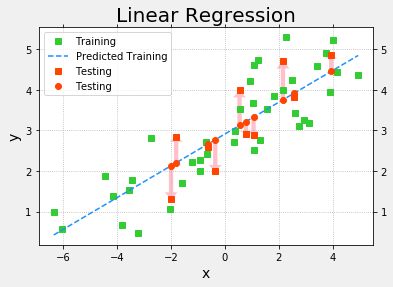

In [35]:
def read_data(file_name):
    x,y = [],[]
    with open(file_name,'r') as f:
        for line in f.readlines():
            data = [float(substr) for substr in line.split(',')]
            x.append(data[:-1])
            y.append(data[-1])
        return np.array(x),np.array(y)

def load_model(filename):
    with open(filename,'rb') as f:
        model = pickle.load(f)
    return model

# 预测模型
def pred_model(model,x):
    y = model.predict(x)
    return y

# 评估模型
def eval_model(y,pred_y):
    # 平均绝对误差
    mae = sm.mean_absolute_error(y,pred_y)
    mse = sm.mean_squared_error(y,pred_y)
    mda = sm.median_absolute_error(y,pred_y)
    evs = sm.explained_variance_score(y,pred_y)
    r2s = sm.r2_score(y,pred_y)
    print(mae,mse,mda,evs,r2s)

def init_chart():
    mp.gcf().set_facecolor(np.ones(3)*240/255)
    mp.title('Linear Regression',fontsize=20)
    mp.xlabel('x',fontsize=14)
    mp.ylabel('y',fontsize=14)
    mp.tick_params(which='both',top=True,right=True,
                  labelright=True,labelsize=10)
    mp.grid(linestyle=':')
    
def draw_train(train_x,train_y,pred_train_y):
    mp.plot(train_x,train_y,'s',c='limegreen',
           label='Training')
    # 排序索引,argsort()返回数组从小到大的索引值
    sorted_indices = train_x.T[0].argsort()
    mp.plot(train_x.T[0][sorted_indices],
           pred_train_y[sorted_indices],'--',c='dodgerblue',
           label='Predicted Training')
    mp.legend()

def draw_test(test_x,test_y,pred_test_y):
    mp.plot(test_x,test_y,'s',c='orangered',label='Testing')
    mp.plot(test_x,pred_test_y,'o',c='orangered',label='Testing')
    for x,pred_y,y in zip(test_x,pred_test_y,test_y):
        mp.gca().add_patch(mc.Arrow(x,pred_y,0,y-pred_y,
                                   width=0.8,
                                   ec='none',
                                   fc='pink'))
        
    mp.legend()
    
def show_chart():
    mng = mp.get_current_fig_manager()
    if 'Windows' in platform.system():
        mng.window.state('zoomed')
    else:
        mng.resize(100,100)
    mp.show()

def main():
    model = load_model('linear.mod')
    x,y = read_data('single.txt')
    # 取总样本的百分之八十作为训练集
    train_size = int(x.size*0.8)
    train_x = x[:train_size]
    train_y = y[:train_size]
    pred_train_y = pred_model(model,train_x)
    # 对模型进行评估
    eval_model(train_y,pred_train_y)
    test_x = x[train_size:]
    test_y = y[train_size:]
    pred_test_y = pred_model(model,test_x)
    eval_model(test_y,pred_test_y)
    init_chart()
    draw_train(train_x,train_y,pred_train_y)
    draw_test(test_x,test_y,pred_test_y)
    show_chart()

if __name__ == '__main__':
    main()
